<a href="https://colab.research.google.com/github/moniker0/github-credit-card-fraud-detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Credit Card Fraud Detection**

Credit card companies should be able to recognize fraudulent credit card transactions so that their customers are not charged for items that they did not purchase.

In [26]:
# import dependencies

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_curve, auc, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import credit card data into a pandas dataframe

credit_card_data = pd.read_csv('/content/creditcard.csv')

In [3]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Dataset Information**

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. It contains only numerical input variables which are the result of a PCA transformation. Due to confidentiality issues, the original features and more background information about the data is not available. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [4]:
# dataset info

credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# checking number of missing values in each column
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [14]:
# distribution of legit vs fraudulant transactions.

class_counts = credit_card_data['Class'].value_counts()
class_counts

,count
Class,
0,284315
1,492


Text(0, 0.5, 'Frequency')

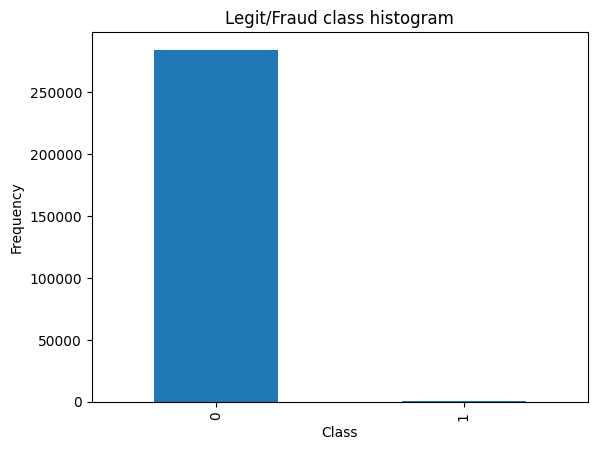

In [13]:
class_counts.plot(kind='bar')
plt.title("Legit/Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

**Imbalanced Dataset**

The above output suggests that the data is highly
skewed/imbalanced.

*   Legit: 284315
*   Fraud: 492

Fraud cases are <0.2% of total i.e. 492/284807*100 = 0.172%)

## **Creating a baseline model with imbalanced data using a logistic regression model**

In [40]:
# Normalize the Time and Amount variables as they are not PCA transformed
scaler = StandardScaler()
credit_card_data['N_Time'] = scaler.fit_transform(credit_card_data[['Time']])
credit_card_data['N_Amount'] = scaler.fit_transform(credit_card_data[['Amount']])

In [41]:
# load X and y variables
X = credit_card_data.drop(columns=['Class','Time', 'Amount'], axis = 1)
y = credit_card_data['Class']

In [44]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [45]:
# Initialize and train the Logistic Regression model
# Use class weights to handle imbalance
model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [46]:
# predict probabilities for the positive(Fraud) class
y_scores = model.predict_proba(X_test)[:, 1]

Since we are dealing with imbalanced data, we will be using the Area Under the Precision-Recall Curve (AUPRC) for measuring model performance as compared to AUC of ROC curve as AUPRC focuses on minority class.

In [48]:
# caluclate Precision-Recall Curve and Area Under Precision-Recall Curve(AUPRC)
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
auprc = auc(recall, precision)


In [50]:
# Print AUPRC
print(f"Area Under the Precision-Recall Curve (AUPRC): {auprc:.4f}")

Area Under the Precision-Recall Curve (AUPRC): 0.7406


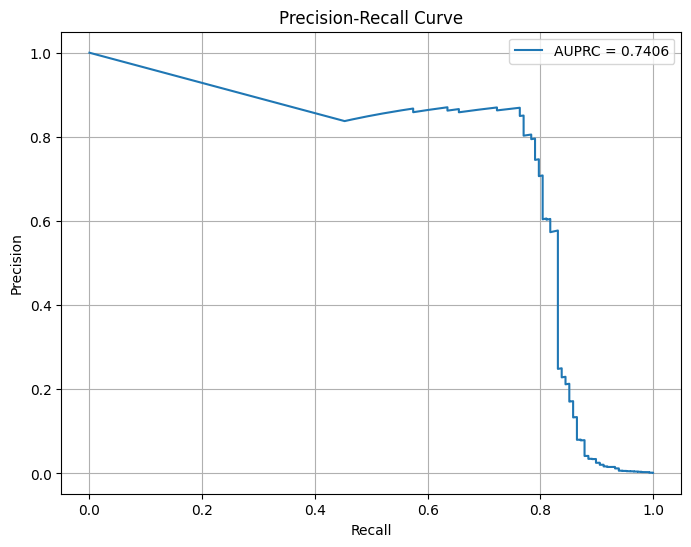

In [51]:
# Step 6: Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"AUPRC = {auprc:.4f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.grid()
plt.show()

AUPRC of 0.7406 indicates a good performance for the model.
The AUPRC curve indicates that as the recall increases, the precision of detecting fraudulent cases decreases i.e. more False Positives. So the model does a good job of identifying fraudulent transactions but with a lot of incorrectly flagged non-fraud cases. Such cases might have to be reviewed and investigated manually which might be costly.

Since catching fraud is quite critical to business, favouring high recall here at the cost of low precision.


In [52]:
# Step 7: Optional - Evaluate the model using classification metrics
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.07      0.88      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.56     85443
weighted avg       1.00      0.98      0.99     85443



The F1 score (balance of precision and recall) is nearly perfect for non-fraud transactions i.e. 0.99.
However, for the fraud class, the low F1-score of 0.12 indicates poor balance between precision and recall for fraud detection.
Overall F1 score of 0.56 balances precision and recall across both classes. This low score reflects poor performance for the minority (fraud) class.
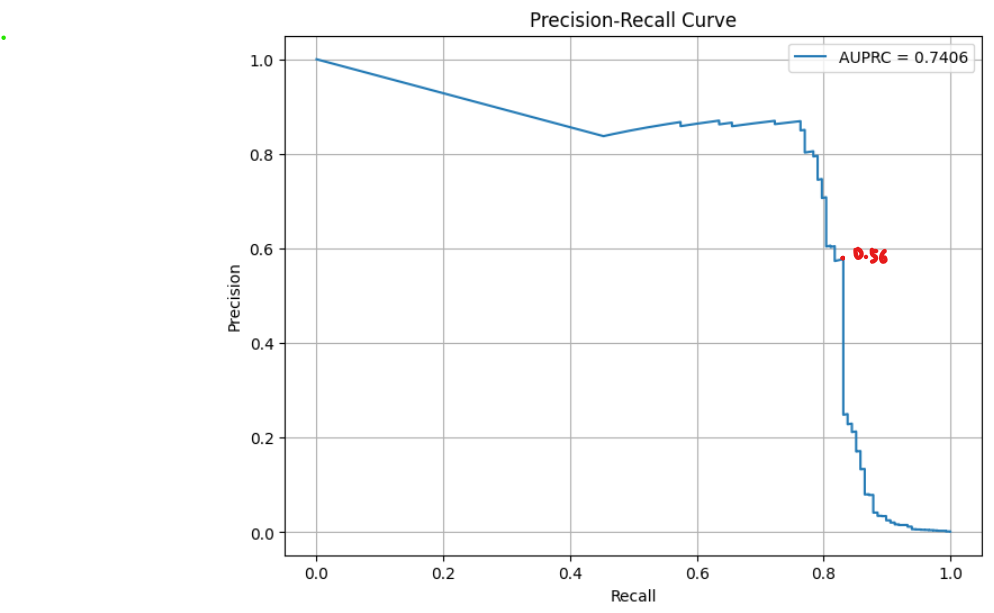

**Key insights from this model**:

*   Good Recall for Fraud (Class 1):

The model successfully identifies 88% of fraudulent transactions, which is a critical aspect in fraud detection since missing fraud can have serious consequences.

*   Poor Precision for Fraud (Class 1):

Only 7% of predicted fraud transactions are actually fraud. This indicates a high number of false positives, which can cause operational inefficiencies (e.g., manually investigating many non-fraudulent transactions).

*   Misleading Accuracy:

The high accuracy of 98% is driven by the majority class (non-fraud), not by the model’s ability to detect fraud effectively.

**To improve the precision for the Fraud class and reduce false positives, one of the ways is to optimize the decision threshold or try better sampling techniques like under-sampling non-fraud cases OR over-sampling fraud cases OR using SMOTE, etc.**

# **Adjust Decision Threshold in the baseline model**

In [53]:
# Print the thresholds with their corresponding precision and recall
for t, p, r in zip(thresholds, precision[:-1], recall[:-1]):  # Exclude the last element for alignment
    print(f"Threshold: {t:.2f}, Precision: {p:.2f}, Recall: {r:.2f}")

Streaming output truncated to the last 5000 lines.
Threshold: 0.26, Precision: 0.03, Recall: 0.90
Threshold: 0.26, Precision: 0.03, Recall: 0.90
Threshold: 0.26, Precision: 0.03, Recall: 0.90
Threshold: 0.26, Precision: 0.03, Recall: 0.90
Threshold: 0.26, Precision: 0.03, Recall: 0.90
Threshold: 0.26, Precision: 0.03, Recall: 0.90
Threshold: 0.26, Precision: 0.03, Recall: 0.90
Threshold: 0.26, Precision: 0.03, Recall: 0.90
Threshold: 0.26, Precision: 0.03, Recall: 0.90
Threshold: 0.26, Precision: 0.03, Recall: 0.90
Threshold: 0.26, Precision: 0.03, Recall: 0.90
Threshold: 0.26, Precision: 0.03, Recall: 0.90
Threshold: 0.26, Precision: 0.03, Recall: 0.90
Threshold: 0.26, Precision: 0.03, Recall: 0.90
Threshold: 0.26, Precision: 0.03, Recall: 0.90
Threshold: 0.26, Precision: 0.03, Recall: 0.90
Threshold: 0.26, Precision: 0.03, Recall: 0.90
Threshold: 0.26, Precision: 0.03, Recall: 0.90
Threshold: 0.26, Precision: 0.03, Recall: 0.90
Threshold: 0.26, Precision: 0.03, Recall: 0.90
Threshold

In [54]:
# Compute F1-Score for each threshold
f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1] + 1e-10)  # Avoid division by zero
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]

print(f"Best Threshold: {best_threshold:.2f}, F1-Score: {f1_scores[best_threshold_index]:.2f}")


Best Threshold: 1.00, F1-Score: 0.81


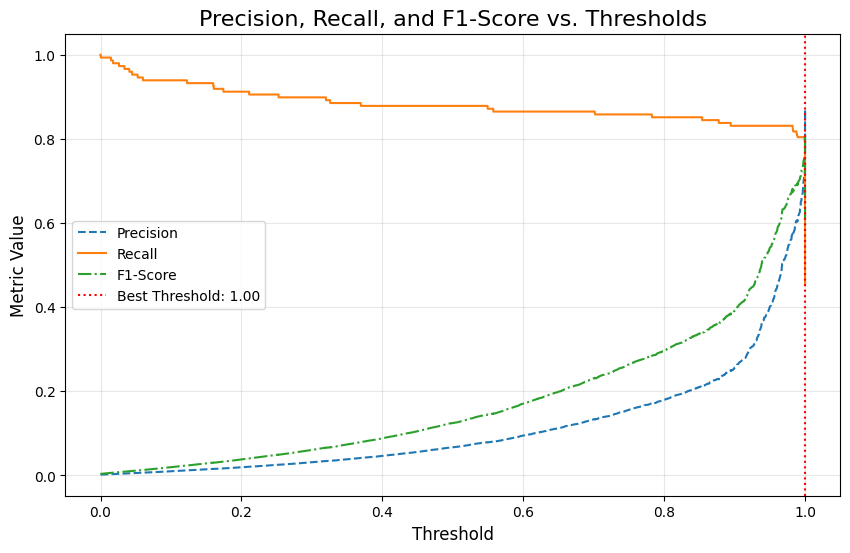

In [55]:
import matplotlib.pyplot as plt

# Plot precision, recall, and F1-Score vs. thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision', linestyle='--')
plt.plot(thresholds, recall[:-1], label='Recall', linestyle='-')
plt.plot(thresholds, f1_scores, label='F1-Score', linestyle='-.')
plt.axvline(x=best_threshold, color='red', linestyle=':', label=f'Best Threshold: {best_threshold:.2f}')

plt.title('Precision, Recall, and F1-Score vs. Thresholds', fontsize=16)
plt.xlabel('Threshold', fontsize=12)
plt.ylabel('Metric Value', fontsize=12)
plt.legend(loc='best', fontsize=10)
plt.grid(alpha=0.3)
plt.show()

In [ ]:
#separating data for analysis

legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [ ]:
# statistical measures of the data

legit.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [ ]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [ ]:
# compare the values for both transaction classes
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


*The means of the two classes are very different

Dealing with the imbalanced data.

Build a sample dataset containing similar distribution of normal and fraudulant transactions.

Number of Fraudulent transactions --> 492

Randomly select 492 transactions from the legit transaction dataset and join with the fraudulent transactions.

In [ ]:
legit_sample = legit.sample(n=492)

In [ ]:
# concatenate the legit_sample with fraud data frames

new_dataset = pd.concat([legit_sample, fraud], axis = 0)

In [ ]:
new_dataset['Class'].value_counts()

,count
Class,
0,492
1,492


In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,93728.636179,0.104131,-0.044729,0.012128,-0.011130,-0.018583,0.050157,-0.046604,0.056011,-0.039693,0.027051,-0.022146,-0.003830,-0.037129,0.033425,-0.010660,0.003104,0.015094,0.053954,0.059619,-0.000167,0.011336,-0.019174,-0.005984,-0.005063,-0.004776,-0.006854,-0.001992,-0.002556,89.435467
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


The means of this new dataset is similar to the original dataset, indicating that the nature of the dataset hasn't changed after sampling, meaning this is a good sample.

A bad sample would have given different means.

In [ ]:
# Now Split the data into Features and Targets

X = new_dataset.drop(columns= ('Class'), axis = 1)
Y = new_dataset['Class']

In [ ]:
# Split the data into training and testing data
# stratify = Y allows even distribution of 0/1 classes in the train and test data)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [ ]:
# Model Training

# Logistic Regression

model = LogisticRegression()

In [ ]:
#standardize the features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
# training the logistic regression model with training data

model.fit(X_train_scaled, Y_train)

LogisticRegression()

In [ ]:
# model evaluation

# Accuracy score
# Accuuracy on training data
X_train_prediction = model.predict(X_train_scaled)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on training data:', training_data_accuracy)

Accuracy on training data: 0.9529860228716646


In [ ]:
X_test_prediction = model.predict(X_test_scaled)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy on testing data:', test_data_accuracy)

Accuracy on testing data: 0.9441624365482234
